In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def collide(gamma,time,y1,y2,v1,v2):
    vrel = v2-v1
    print ('********',v2,v1,vrel)
    v1new = gamma**2*abs(vrel)
    y1new = y2
    toffset = time
    vzero = v1new
    h = y1
    return h, toffset, vzero, v1new, y1new

dt = 0.001
h = 0.05
g = 9.807
A = 0.02
gamma = 1.00

fs = 25.0

nsteps = 50000
epsilon = 0.008

y1 = []
y2 = []
v1 = []
v2 = []
time = []
f = []
vzero = 0.0
ncol = 0
toffset = 0.0

for i in range(nsteps+1):
    time.append(i*dt)
    f.append(i/(nsteps*dt))
    y1.append(h + vzero*(time[i]-toffset) - 0.5*g*(time[i]-toffset)**2)
    v1.append(vzero - g*(time[i]-toffset))
    y2.append(A*math.sin(2.0*math.pi*fs*time[i]))
    v2.append(A*(2.0*math.pi*fs)*math.cos(2.0*math.pi*fs*time[i]))
    diff = abs(y1[i]-y2[i])
    #print (i,y1[i],y2[i],v1[i],v2[i],diff)
    if ((y1[i]-y2[i])<0):
        print ("collision",y1[i],y2[i],v1[i],v2[i],diff," at t = ",time[i])
        ncol += 1
        h, toffset, vzero, v1new, y1new = collide(gamma,time[i],y1[i],y2[i],v1[i],v2[i])
        #print (h,toffset,vzero,v1new)

        y1[i] = y1new
        v1[i] = v1new
        #print (i,y1[i],y2[i],v1[i],v2[i])
        #print ("******",h + vzero*(time[i]-toffset+.001) - 0.5*g*(time[i]-toffset+.001)**2)
        #if (ncol == 3):
        #    break

print ("Done")

collision 0.013733713999999994 0.01618033988749896 -0.8434020000000001 1.8465818304904535 0.0024466258874989676  at t =  0.08600000000000001
******** 1.8465818304904535 -0.8434020000000001 2.6899838304904535
collision 0.016418794330490448 0.017820130483767377 2.6801768304904536 1.4262532187813133 0.001401336153276929  at t =  0.08700000000000001
******** 1.4262532187813133 2.6801768304904536 -1.2539236117091404
collision 0.017667814442199573 0.01902113032590307 1.2441166117091405 0.970805519362735 0.0013533158837034966  at t =  0.088
******** 0.970805519362735 1.2441166117091405 -0.2733110923464055
collision 0.01793622203454598 0.019753766811902752 0.2635040923464055 0.49145336613864304 0.0018175447773567735  at t =  0.089
******** 0.49145336613864304 0.2635040923464055 0.22794927379223756
collision 0.018159267808338216 0.02 0.21814227379223755 1.7313036243496109e-15 0.0018407321916617848  at t =  0.09
******** 1.7313036243496109e-15 0.21814227379223755 -0.21814227379223583
collision 0

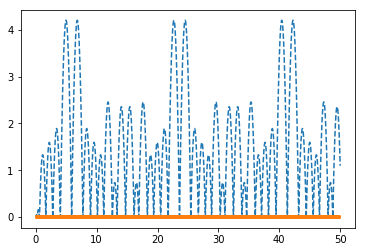

In [2]:
plt.plot(time,y1,'--')
plt.plot(time,y2,'-')
plt.show()

In [3]:
ft = np.fft.fft(y1)

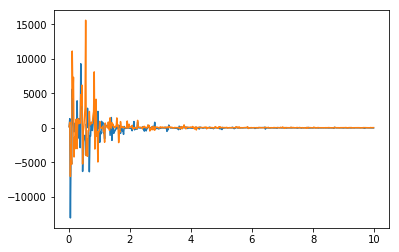

In [4]:
plt.plot(f[1:int(nsteps/100)],np.real(ft)[1:int(nsteps/100)])
plt.plot(f[1:int(nsteps/100)],np.imag(ft)[1:int(nsteps/100)])
plt.show()